### Assignment - Advanced Regression

Build a regularized regression model to understand the most important variables to predict the house prices in Australia.

#### Importing the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import PolynomialFeatures

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(12,10)})
pd.set_option('display.max_columns',None)

#### Reading the data

In [2]:
df = pd.read_csv('train.csv')
df.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

#### Data exploration


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Missing value calculation for each column

In [4]:
with pd.option_context('display.max_rows', None):
    print((df.isnull().sum()/df.shape[0]).sort_values(ascending=False))


PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
LotFrontage      0.177397
GarageYrBlt      0.055479
GarageCond       0.055479
GarageType       0.055479
GarageFinish     0.055479
GarageQual       0.055479
BsmtFinType2     0.026027
BsmtExposure     0.026027
BsmtQual         0.025342
BsmtCond         0.025342
BsmtFinType1     0.025342
MasVnrArea       0.005479
MasVnrType       0.005479
Electrical       0.000685
Id               0.000000
Functional       0.000000
Fireplaces       0.000000
KitchenQual      0.000000
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
HalfBath         0.000000
FullBath         0.000000
BsmtHalfBath     0.000000
TotRmsAbvGrd     0.000000
GarageCars       0.000000
GrLivArea        0.000000
GarageArea       0.000000
PavedDrive       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea    

### Missing value treatment

#### Some columns with missing value is meaningful, it means lack of that feature.

In [5]:
NULL_COLS= ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
       'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
       'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'MasVnrType']

df[NULL_COLS].isna().sum()

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrType         8
dtype: int64

#### Treating those missing values

In [6]:
df[NULL_COLS]=df[NULL_COLS].fillna('None')

In [7]:
df[NULL_COLS].isna().sum()

PoolQC          0
MiscFeature     0
Alley           0
Fence           0
FireplaceQu     0
GarageCond      0
GarageType      0
GarageFinish    0
GarageQual      0
BsmtFinType2    0
BsmtExposure    0
BsmtQual        0
BsmtCond        0
BsmtFinType1    0
MasVnrType      0
dtype: int64

In [8]:
df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace=True)

In [9]:
df['Electrical'].fillna(df['Electrical'].mode()[0],inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0],inplace=True)

In [10]:
df['MasVnrArea'].fillna(0,inplace=True)

In [11]:
with pd.option_context('display.max_rows', None):
    print(((df.isnull().sum()/df.shape[0]).sort_values(ascending=False)).sum())


0.0


Converting from object to numric type as **MSSubClass** is categorical

In [12]:
df['MSSubClass']=df['MSSubClass'].apply(str)

In [13]:
object_cols = list(df.select_dtypes('object').columns)
numeric_cols = list(df.select_dtypes('number').columns)
numeric_cols.remove('Id')


#### Data Exploration and understanding

#### Univariate Analysis

<Figure size 864x720 with 0 Axes>

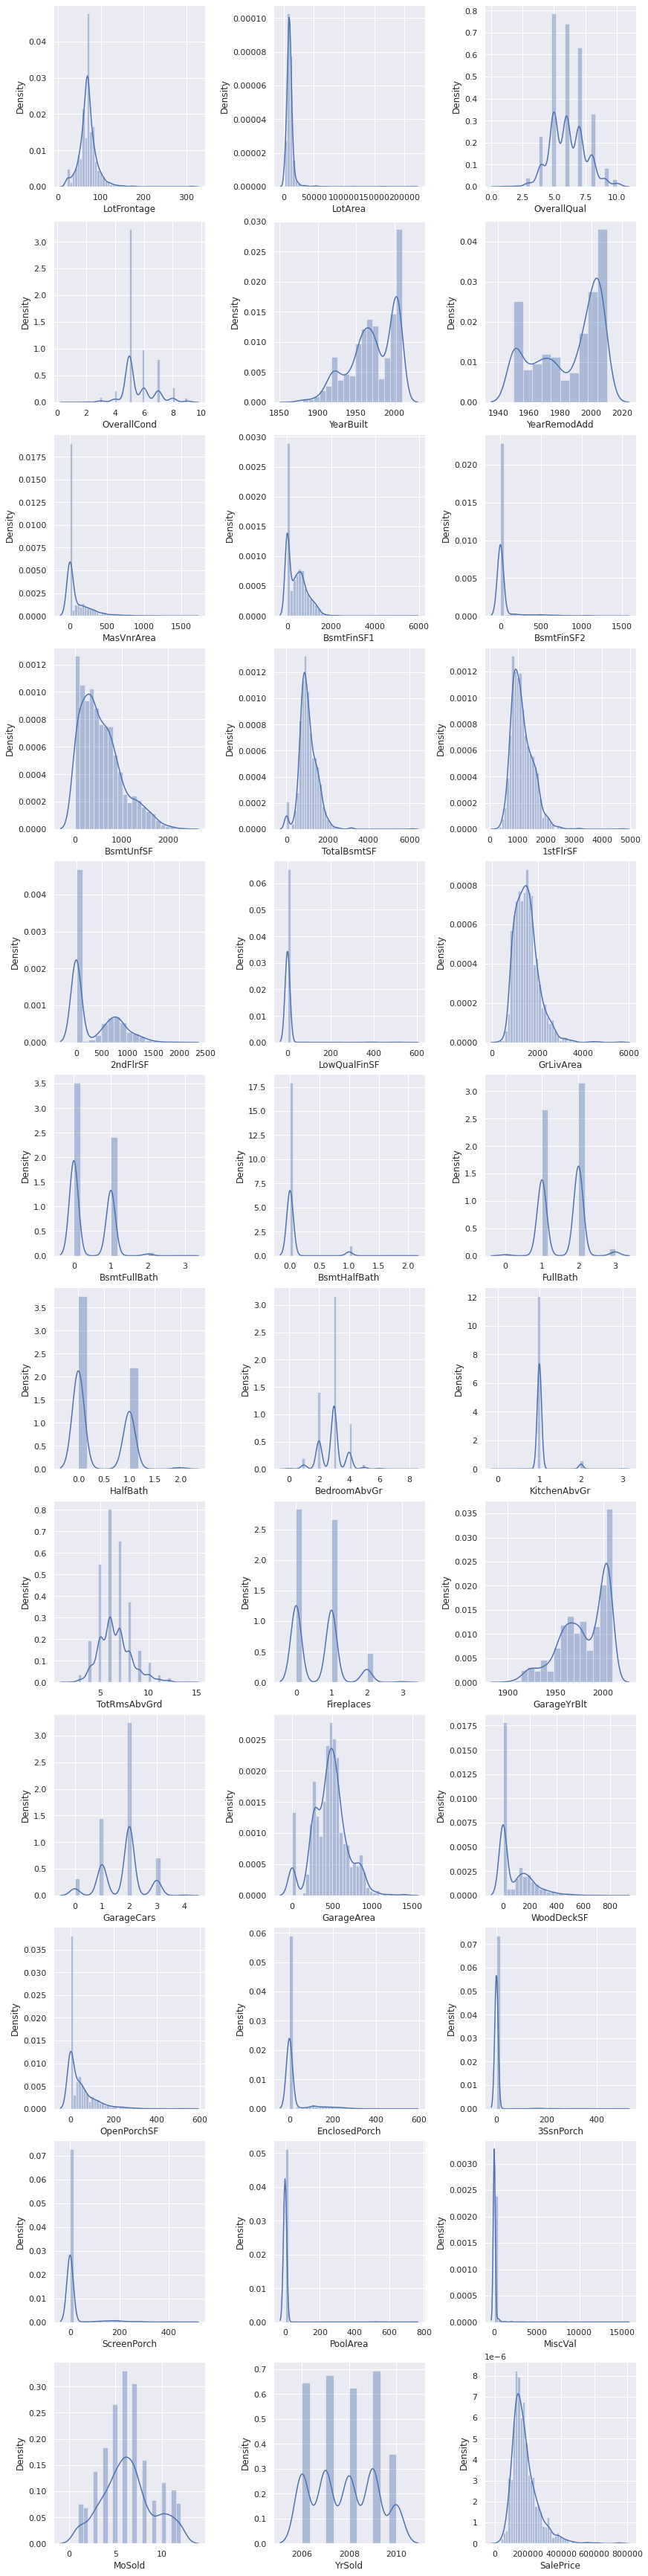

In [14]:
ncols = 3
nrows = math.ceil(len(numeric_cols)/3)
plt.subplots_adjust(hspace = 0.8)

fig,axes = plt.subplots(nrows, ncols, figsize=(12,nrows*4), constrained_layout=True)
i=0
j=0
for col in numeric_cols:
    sns.distplot(df[col], ax=axes[i,j])
    j+=1
    if j>2:
        j=0
        i+=1

<Figure size 864x720 with 0 Axes>

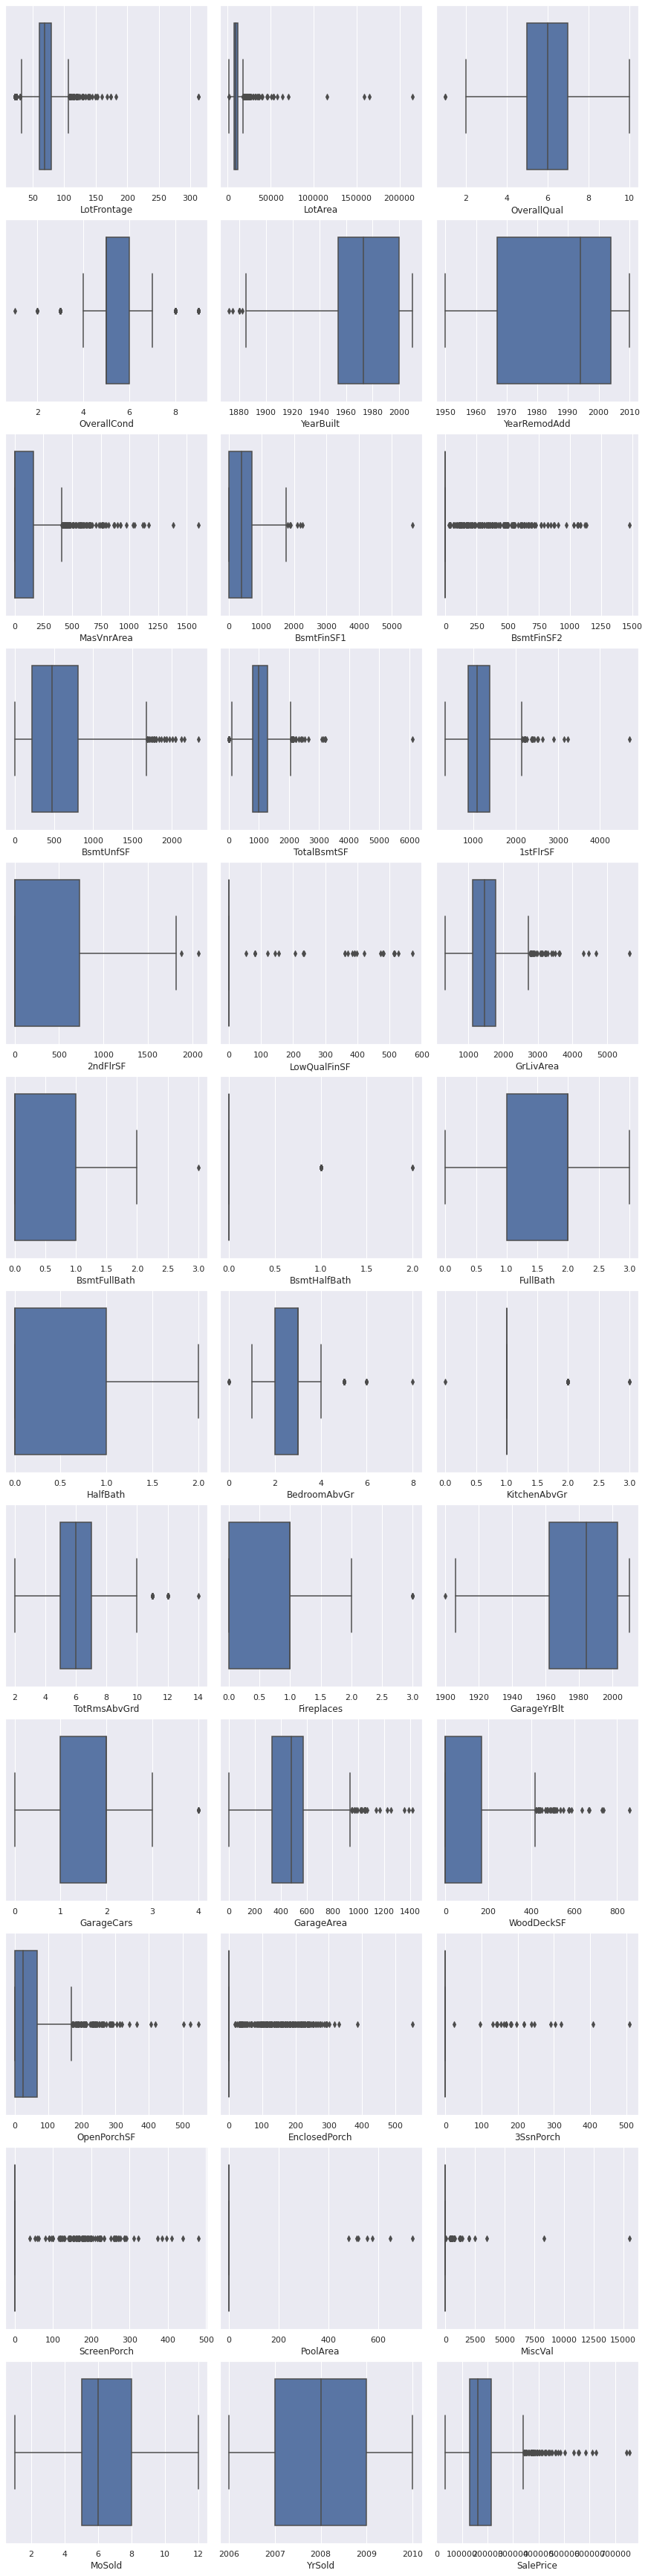

In [15]:
ncols = 3
nrows = math.ceil(len(numeric_cols)/3)
plt.subplots_adjust(hspace = 0.8)

fig,axes = plt.subplots(nrows, ncols, figsize=(12,nrows*4), constrained_layout=True)
i=0
j=0
for col in numeric_cols:
    sns.boxplot(df[col], ax=axes[i,j])
    j+=1
    if j>2:
        j=0
        i+=1

### Bivariate Analysis

<Figure size 864x720 with 0 Axes>

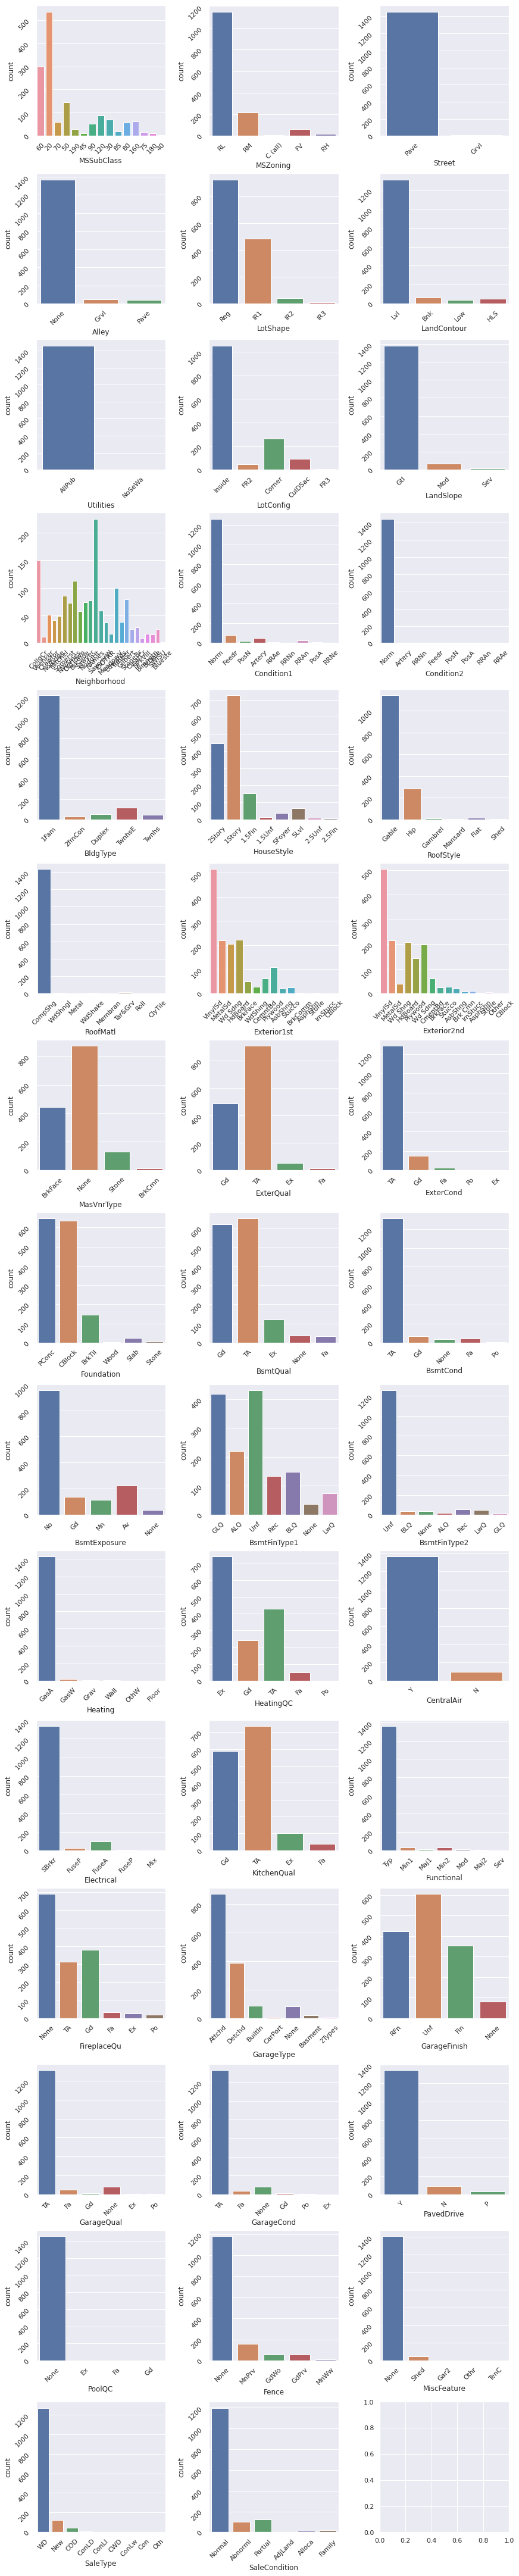

In [16]:
ncols = 3
nrows = math.ceil(len(object_cols)/3)
plt.subplots_adjust(hspace = 0.8)

fig,axes = plt.subplots(nrows, ncols, figsize=(12,nrows*4), constrained_layout=True)
i=0
j=0
for col in object_cols:
    sns.countplot(data=df,x=col, ax=axes[i,j])
    axes[i,j].tick_params(labelrotation=45)
    j+=1
    if j>2:
        j=0
        i+=1

<Figure size 864x720 with 0 Axes>

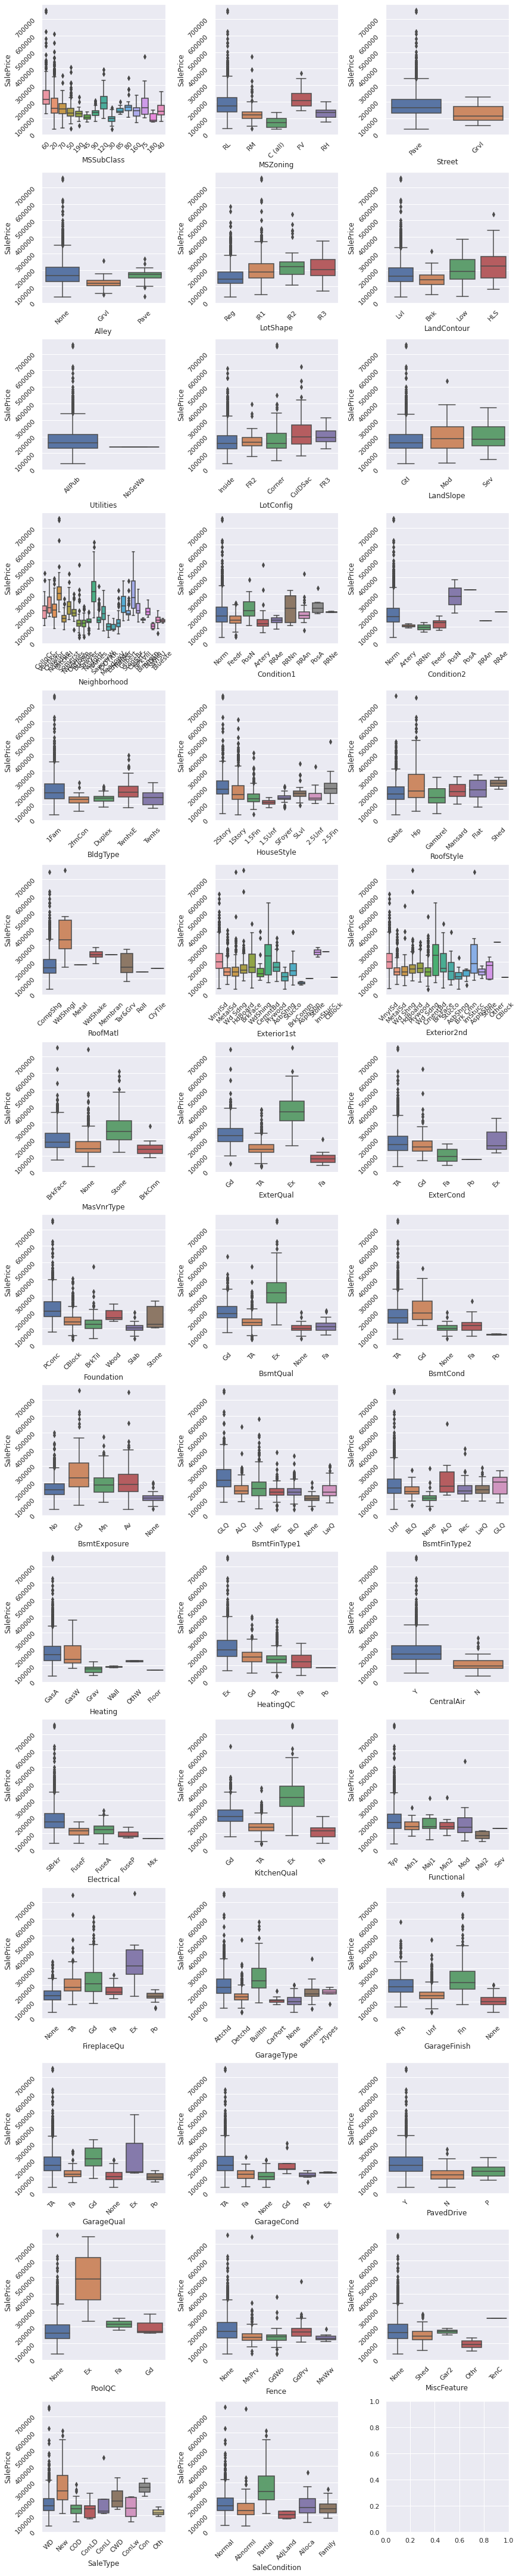

In [17]:
ncols = 3
nrows = math.ceil(len(object_cols)/3)
plt.subplots_adjust(hspace = 0.8)

fig,axes = plt.subplots(nrows, ncols, figsize=(12,nrows*4), constrained_layout=True)
i=0
j=0
for col in object_cols:
    p = sns.boxplot(data=df,x=col,y='SalePrice',ax=axes[i,j])
    axes[i,j].tick_params(labelrotation=45)
    j+=1
    if j>2:
        j=0
        i+=1

<Figure size 864x720 with 0 Axes>

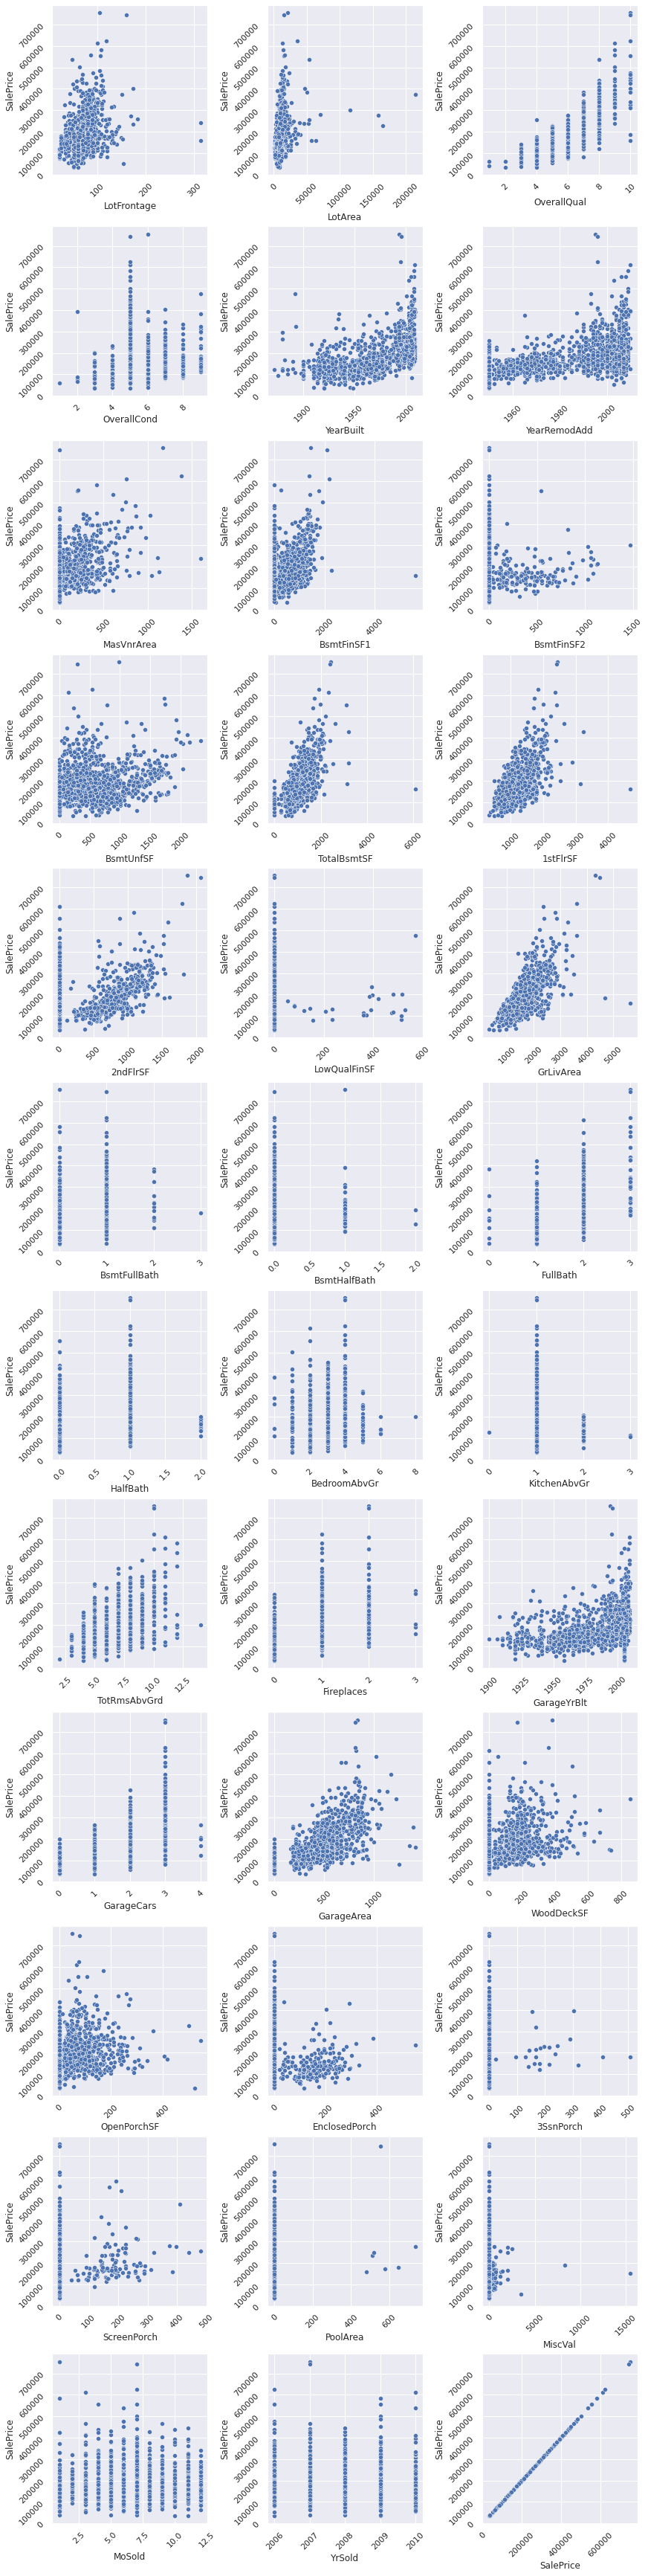

In [18]:
ncols = 3
nrows = math.ceil(len(numeric_cols)/3)
plt.subplots_adjust(hspace = 0.8)

fig,axes = plt.subplots(nrows, ncols, figsize=(12,nrows*4), constrained_layout=True)
i=0
j=0
for col in numeric_cols:
    p = sns.scatterplot(data=df,x=col,y='SalePrice',ax=axes[i,j])
    axes[i,j].tick_params(labelrotation=45)
    j+=1
    if j>2:
        j=0
        i+=1

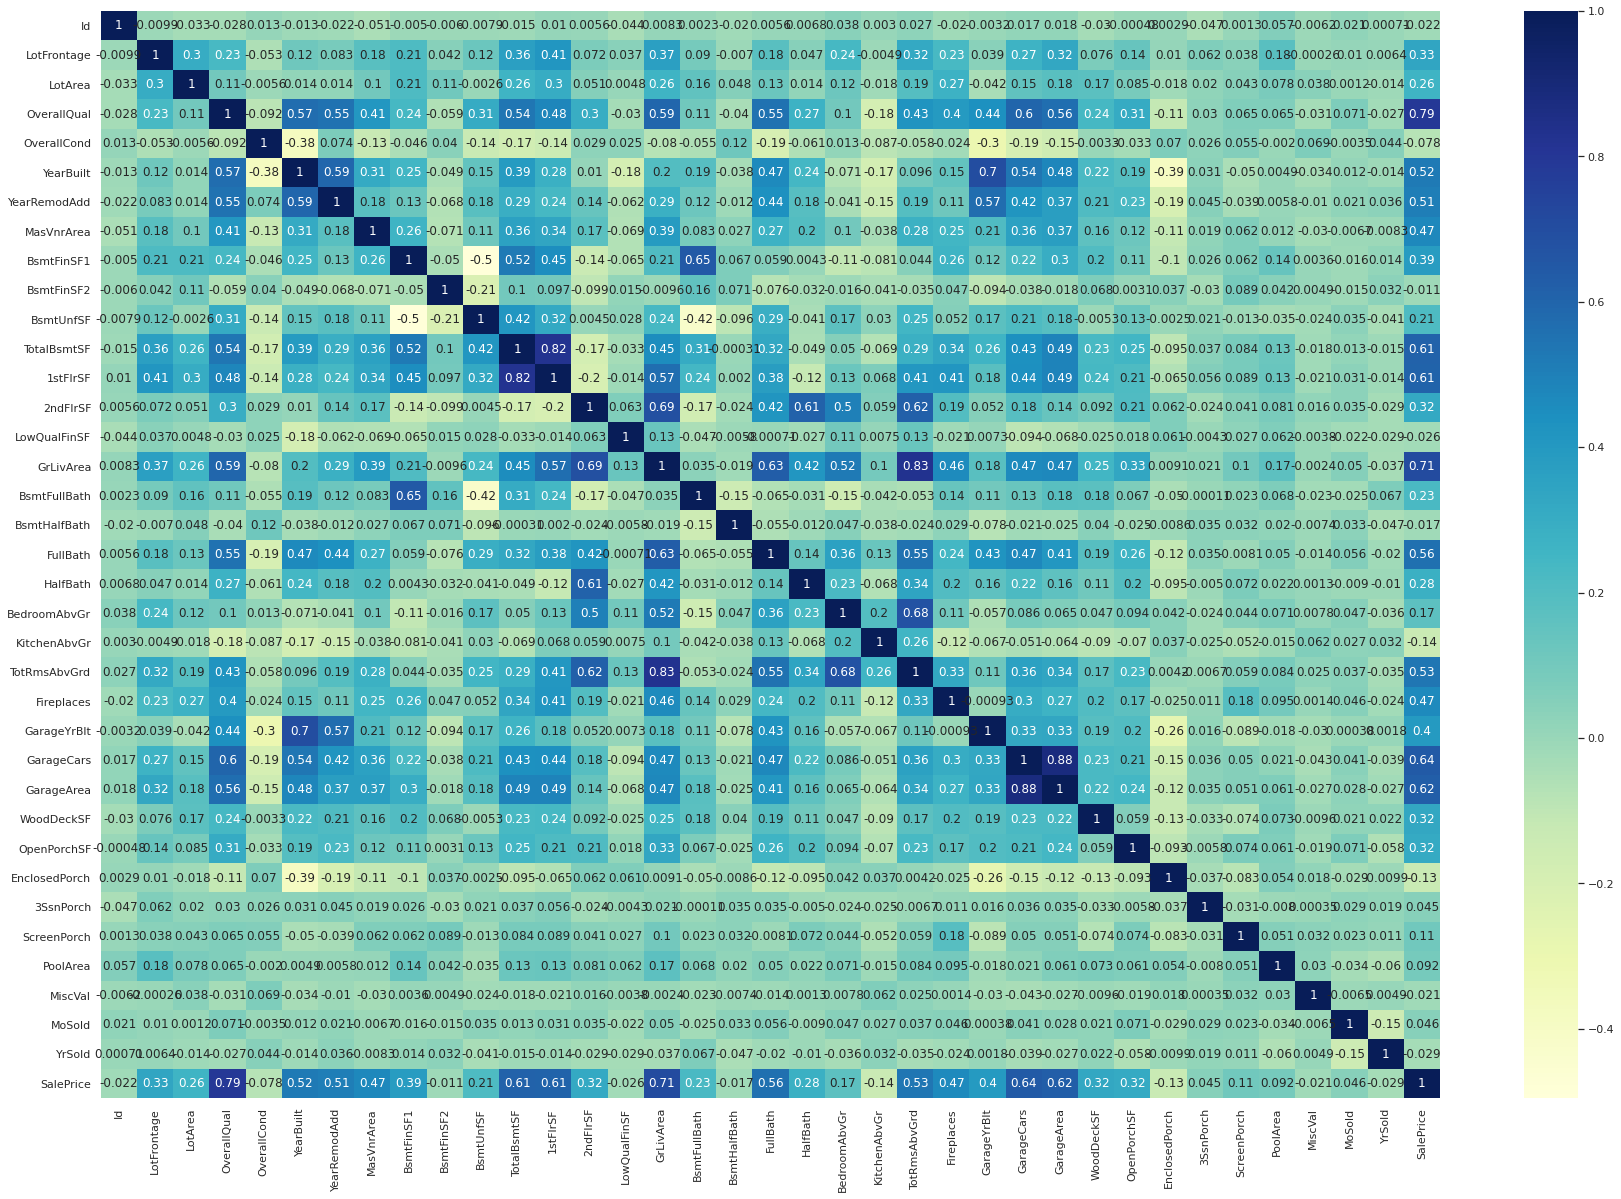

In [19]:
plt.figure(figsize = (30, 20))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Feature engineering

#### Creating dummy variables for some of the unordered categorical variables

In [20]:
dummy_cols = []
dual_cat_cols=['Condition1','Condition2','Exterior1st','Exterior2nd','BsmtFinType1','BsmtFinType2']
ordered_cat_cols=['Alley', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                  'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC']
for col in object_cols:
    if len(df[col].unique())<=2:
        continue
    if col in dual_cat_cols or col in ordered_cat_cols:
        continue
    col_df = pd.get_dummies(df[col], drop_first=True, prefix=col)
    df = pd.concat([df, col_df], axis=1)
    dummy_cols.append(col)

In [21]:
df = df.drop(dummy_cols,axis=1)


In [22]:
for col in object_cols:
    try:
        if len(df[col].unique())<=2:
            print(col)
        elif col in dual_cat_cols or col in ordered_cat_cols:
            print(col)
    except:
        continue

Street
Alley
Utilities
LandSlope
Condition1
Condition2
Exterior1st
Exterior2nd
ExterQual
ExterCond
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
CentralAir
KitchenQual
FireplaceQu
GarageQual
GarageCond
PavedDrive
PoolQC


In [23]:
df

Id  LotFrontage  LotArea Street Alley Utilities LandSlope Condition1  \
0        1         65.0     8450   Pave  None    AllPub       Gtl       Norm   
1        2         80.0     9600   Pave  None    AllPub       Gtl      Feedr   
2        3         68.0    11250   Pave  None    AllPub       Gtl       Norm   
3        4         60.0     9550   Pave  None    AllPub       Gtl       Norm   
4        5         84.0    14260   Pave  None    AllPub       Gtl       Norm   
...    ...          ...      ...    ...   ...       ...       ...        ...   
1455  1456         62.0     7917   Pave  None    AllPub       Gtl       Norm   
1456  1457         85.0    13175   Pave  None    AllPub       Gtl       Norm   
1457  1458         66.0     9042   Pave  None    AllPub       Gtl       Norm   
1458  1459         68.0     9717   Pave  None    AllPub       Gtl       Norm   
1459  1460         75.0     9937   Pave  None    AllPub       Gtl       Norm   

     Condition2  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          Norm            7            5       2003          2003   
1          Norm            6            8       1976          1976   
2          Norm            7            5       2001          2002   
3          Norm            7            5       1915          1970   
4          Norm            8            5       2000          2000   
...         ...          ...          ...        ...           ...   
1455       Norm            6            5       1999          2000   
1456       Norm            6            6       1978          1988   
1457       Norm            7            9       1941          2006   
1458       Norm            5            6       1950          1996   
1459       Norm            5            6       1965          1965   

     Exterior1st Exterior2nd  MasVnrArea ExterQual ExterCond BsmtQual  \
0        VinylSd     VinylSd       196.0        Gd        TA       Gd   
1        MetalSd     MetalSd         0.0        TA        TA       Gd   
2        VinylSd     VinylSd       162.0        Gd        TA       Gd   
3        Wd Sdng     Wd Shng         0.0        TA        TA       TA   
4        VinylSd     VinylSd       350.0        Gd        TA       Gd   
...          ...         ...         ...       ...       ...      ...   
1455     VinylSd     VinylSd         0.0        TA        TA       Gd   
1456     Plywood     Plywood       119.0        TA        TA       Gd   
1457     CemntBd     CmentBd         0.0        Ex        Gd       TA   
1458     MetalSd     MetalSd         0.0        TA        TA       TA   
1459     HdBoard     HdBoard         0.0        Gd        TA       TA   

     BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0          TA           No          GLQ         706          Unf           0   
1          TA           Gd          ALQ         978          Unf           0   
2          TA           Mn          GLQ         486          Unf           0   
3          Gd           No          ALQ         216          Unf           0   
4          TA           Av          GLQ         655          Unf           0   
...       ...          ...          ...         ...          ...         ...   
1455       TA           No          Unf           0          Unf           0   
1456       TA           No          ALQ         790          Rec         163   
1457       Gd           No          GLQ         275          Unf           0   
1458       TA           Mn          GLQ          49          Rec        1029   
1459       TA           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           150          856          Y       856       854             0   
1           284         1262          Y      1262         0             0   
2           434          920          Y       920       866             0   
3           540          756          Y       961       756 

#### Taking care of ordered categorical variables

In [24]:
for col in ordered_cat_cols:
    print(col," : ",df[col].unique())

Alley  :  ['None' 'Grvl' 'Pave']
Utilities  :  ['AllPub' 'NoSeWa']
LandSlope  :  ['Gtl' 'Mod' 'Sev']
ExterQual  :  ['Gd' 'TA' 'Ex' 'Fa']
ExterCond  :  ['TA' 'Gd' 'Fa' 'Po' 'Ex']
BsmtQual  :  ['Gd' 'TA' 'Ex' 'None' 'Fa']
BsmtCond  :  ['TA' 'Gd' 'None' 'Fa' 'Po']
BsmtExposure  :  ['No' 'Gd' 'Mn' 'Av' 'None']
KitchenQual  :  ['Gd' 'TA' 'Ex' 'Fa']
FireplaceQu  :  ['None' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageQual  :  ['TA' 'Fa' 'Gd' 'None' 'Ex' 'Po']
GarageCond  :  ['TA' 'Fa' 'None' 'Gd' 'Po' 'Ex']
PavedDrive  :  ['Y' 'N' 'P']
PoolQC  :  ['None' 'Ex' 'Fa' 'Gd']


In [25]:
df.replace({'Alley'  :  {'None':0, 'Grvl':1, 'Pave':2},
'Utilities'  :  {'AllPub':4, 'NoSeWa':2, 'NoSewr':3, 'ELO':1},
'LandSlope'  :  {'Gtl':1, 'Mod':2, 'Sev':3},
'ExterQual'  :  {'Gd':4, 'TA':3, 'Ex':5, 'Fa':2, 'Po':1},
'ExterCond'  :  {'Gd':4, 'TA':3, 'Ex':5, 'Fa':2, 'Po':1},
'BsmtQual'  :   {'Gd':4, 'TA':3, 'Ex':5, 'Fa':2, 'Po':1,'None':0},
'BsmtCond'  :   {'Gd':4, 'TA':3, 'Ex':5, 'Fa':2, 'Po':1,'None':0},
'BsmtExposure'  :  {'No':1, 'Gd':4, 'Mn':2, 'Av':3, 'None':0},
'KitchenQual'  :  {'Gd':4, 'TA':3, 'Ex':5, 'Fa':2, 'Po':1},
'FireplaceQu'  :  {'Gd':4, 'TA':3, 'Ex':5, 'Fa':2, 'Po':1,'None':0},
'GarageQual'  :   {'Gd':4, 'TA':3, 'Ex':5, 'Fa':2, 'Po':1,'None':0},
'GarageCond'  :   {'Gd':4, 'TA':3, 'Ex':5, 'Fa':2, 'Po':1,'None':0},
'PavedDrive'  :  {'Y':2, 'N':0, 'P':1},
'PoolQC'  :  {'Gd':3, 'TA':2, 'Ex':4, 'Fa':1, 'None':0}},inplace=True)

In [26]:
with pd.option_context('display.max_rows', None):
    print(df.dtypes)

Id                         int64
LotFrontage              float64
LotArea                    int64
Street                    object
Alley                      int64
Utilities                  int64
LandSlope                  int64
Condition1                object
Condition2                object
OverallQual                int64
OverallCond                int64
YearBuilt                  int64
YearRemodAdd               int64
Exterior1st               object
Exterior2nd               object
MasVnrArea               float64
ExterQual                  int64
ExterCond                  int64
BsmtQual                   int64
BsmtCond                   int64
BsmtExposure               int64
BsmtFinType1              object
BsmtFinSF1                 int64
BsmtFinType2              object
BsmtFinSF2                 int64
BsmtUnfSF                  int64
TotalBsmtSF                int64
CentralAir                object
1stFlrSF                   int64
2ndFlrSF                   int64
LowQualFin

In [27]:
df.shape

(1460, 191)

#### Some of the columns are pair-wise categorical columns, They mean the house has both the features. These columns have same possible values. It did not make sense to create separate dummy variables for both. 
So, the following code creates one hotcoding for these variables.


In [28]:
def handle_dual_columns(cols, possible_values,final_df):
    selected_cols= final_df[cols]
    for val in possible_values:
        if val !='None':
            selected_cols[val]=0
    for col in cols:
        for val in possible_values:
            if val !='None':
                selected_cols.loc[selected_cols[col]==val,val]=1
    return selected_cols[possible_values]

In [29]:
for col in dual_cat_cols:
    print(col," : ",sorted(df[col].unique()))

Condition1  :  ['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe', 'RRNn']
Condition2  :  ['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNn']
Exterior1st  :  ['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Plywood', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing']
Exterior2nd  :  ['AsbShng', 'AsphShn', 'Brk Cmn', 'BrkFace', 'CBlock', 'CmentBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'Wd Shng']
BsmtFinType1  :  ['ALQ', 'BLQ', 'GLQ', 'LwQ', 'None', 'Rec', 'Unf']
BsmtFinType2  :  ['ALQ', 'BLQ', 'GLQ', 'LwQ', 'None', 'Rec', 'Unf']


In [30]:
condition_df = handle_dual_columns(['Condition1','Condition2'],['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe'],df)
exterior_df = handle_dual_columns(['Exterior1st','Exterior2nd'],['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd','Other', 'Plywood', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing'],df)
bsmt_df = handle_dual_columns(['BsmtFinType1','BsmtFinType2'],['ALQ', 'BLQ', 'GLQ', 'LwQ', 'Rec', 'Unf'],df)

In [31]:
df = pd.concat([df,condition_df],axis=1)
df = pd.concat([df,exterior_df],axis=1)
df = pd.concat([df,bsmt_df],axis=1)

In [32]:
df

Id  LotFrontage  LotArea Street  Alley  Utilities  LandSlope  \
0        1         65.0     8450   Pave      0          4          1   
1        2         80.0     9600   Pave      0          4          1   
2        3         68.0    11250   Pave      0          4          1   
3        4         60.0     9550   Pave      0          4          1   
4        5         84.0    14260   Pave      0          4          1   
...    ...          ...      ...    ...    ...        ...        ...   
1455  1456         62.0     7917   Pave      0          4          1   
1456  1457         85.0    13175   Pave      0          4          1   
1457  1458         66.0     9042   Pave      0          4          1   
1458  1459         68.0     9717   Pave      0          4          1   
1459  1460         75.0     9937   Pave      0          4          1   

     Condition1 Condition2  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          Norm       Norm            7            5       2003          2003   
1         Feedr       Norm            6            8       1976          1976   
2          Norm       Norm            7            5       2001          2002   
3          Norm       Norm            7            5       1915          1970   
4          Norm       Norm            8            5       2000          2000   
...         ...        ...          ...          ...        ...           ...   
1455       Norm       Norm            6            5       1999          2000   
1456       Norm       Norm            6            6       1978          1988   
1457       Norm       Norm            7            9       1941          2006   
1458       Norm       Norm            5            6       1950          1996   
1459       Norm       Norm            5            6       1965          1965   

     Exterior1st Exterior2nd  MasVnrArea  ExterQual  ExterCond  BsmtQual  \
0        VinylSd     VinylSd       196.0          4          3         4   
1        MetalSd     MetalSd         0.0          3          3         4   
2        VinylSd     VinylSd       162.0          4          3         4   
3        Wd Sdng     Wd Shng         0.0          3          3         3   
4        VinylSd     VinylSd       350.0          4          3         4   
...          ...         ...         ...        ...        ...       ...   
1455     VinylSd     VinylSd         0.0          3          3         4   
1456     Plywood     Plywood       119.0          3          3         4   
1457     CemntBd     CmentBd         0.0          5          4         3   
1458     MetalSd     MetalSd         0.0          3          3         3   
1459     HdBoard     HdBoard         0.0          4          3         3   

      BsmtCond  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
0            3             1          GLQ         706          Unf   
1            3             4          ALQ         978          Unf   
2            3             2          GLQ         486          Unf   
3            4             1          ALQ         216          Unf   
4            3             3          GLQ         655          Unf   
...        ...           ...          ...         ...          ...   
1455         3             1          Unf           0          Unf   
1456         3             1          ALQ         790          Rec   
1457         4             1          GLQ         275          Unf   
1458         3             2          GLQ          49          Rec   
1459         3             1          BLQ         830          LwQ   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF CentralAir  1stFlrSF  2ndFlrSF  \
0              0        150          856          Y       856       854   
1              0        284         1262          Y      1262         0   
2              0        434          920          Y       920       866   
3              0        540          756          Y       961       756   
4              0        490         1145 

In [33]:
df.replace({'CentralAir' : {'N':0, 'Y':1},
           'Street':{'Grv':0,'Pave':1}},inplace=True)

In [34]:
df.drop(dual_cat_cols, axis=1, inplace=True)

In [35]:
df.drop(ordered_cat_cols, axis=1, inplace=True)

In [36]:
df.drop(['CentralAir','Street'], axis=1, inplace=True)

In [37]:
with pd.option_context('display.max_rows', None):
    print(df.dtypes)

Id                         int64
LotFrontage              float64
LotArea                    int64
OverallQual                int64
OverallCond                int64
YearBuilt                  int64
YearRemodAdd               int64
MasVnrArea               float64
BsmtFinSF1                 int64
BsmtFinSF2                 int64
BsmtUnfSF                  int64
TotalBsmtSF                int64
1stFlrSF                   int64
2ndFlrSF                   int64
LowQualFinSF               int64
GrLivArea                  int64
BsmtFullBath               int64
BsmtHalfBath               int64
FullBath                   int64
HalfBath                   int64
BedroomAbvGr               int64
KitchenAbvGr               int64
TotRmsAbvGrd               int64
Fireplaces                 int64
GarageYrBlt              float64
GarageCars                 int64
GarageArea                 int64
WoodDeckSF                 int64
OpenPorchSF                int64
EnclosedPorch              int64
3SsnPorch 

#### Creating derived columns

In [38]:
df['GrgAge'] = df.YrSold-df.GarageYrBlt
df['Age'] = df.YearBuilt-df.YrSold
df['Sold'] = 2021 - df.YrSold # this denotes how long ago the house was sold

In [39]:
df.drop(['YrSold','GarageYrBlt','YearBuilt'], axis=1, inplace=True)

In [40]:
df.drop(['Id'], axis=1, inplace=True)

In [41]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [42]:
scaler = MinMaxScaler()
df_train[:] = scaler.fit_transform(df_train)
df_train.head()

LotFrontage   LotArea  OverallQual  OverallCond  YearRemodAdd  \
210      0.157534  0.019306     0.444444        0.625      0.000000   
318      0.236301  0.039403     0.666667        0.500      0.716667   
239      0.106164  0.033981     0.555556        0.375      0.000000   
986      0.130137  0.017931     0.555556        0.875      0.883333   
1416     0.133562  0.046139     0.333333        0.625      0.000000   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
210         0.00    0.082920         0.0   0.169521     0.141408  0.113889   
318         0.16    0.174876         0.0   0.154110     0.220458  0.231481   
239         0.00    0.016655         0.0   0.274401     0.120295  0.098611   
986         0.00    0.000000         0.0   0.207620     0.079378  0.145602   
1416        0.00    0.000000         0.0   0.332620     0.127169  0.202315   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
210   0.000000           0.0   0.081860      0.333333           0.0  0.333333   
318   0.616949           0.0   0.424289      0.333333           0.0  0.666667   
239   0.333656           0.0   0.201576      0.000000           0.0  0.333333   
986   0.307022           0.0   0.230015      0.000000           0.0  0.333333   
1416  0.505569           0.0   0.355880      0.000000           0.0  0.666667   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
210        0.0         0.250           0.0      0.181818    0.000000   
318        0.5         0.500           0.0      0.545455    0.333333   
239        0.5         0.375           0.0      0.363636    0.333333   
986        0.0         0.250           0.0      0.181818    0.000000   
1416       0.0         0.500           0.5      0.727273    0.000000   

      GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
210         0.00    0.000000    0.000000     0.000000       0.173913   
318         0.75    0.462623    0.396733     0.114723       0.260870   
239         0.25    0.155148    0.000000     0.267686       0.000000   
986         0.25    0.179831    0.459743     0.000000       0.000000   
1416        0.50    0.394922    0.000000     0.000000       0.206522   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold  SalePrice  \
210         0.0          0.0       0.0      0.0  0.272727   0.087627   
318         0.0          0.0       0.0      0.0  0.272727   0.312595   
239         0.0          0.0       0.0      0.0  0.272727   0.108457   
986         0.0          0.0       0.0      0.0  0.454545   0.114012   
1416        0.0          0.0       0.0      0.0  0.272727   0.121650   

      MSSubClass_160  MSSubClass_180  MSSubClass_190  MSSubClass_20  \
210              0.0             0.0             0.0            0.0   
318              0.0             0.0             0.0            0.0   
239              0.0             0.0             0.0            0.0   
986              0.0             0.0             0.0            0.0   
1416             0.0             0.0             1.0            0.0   

      MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
210             1.0            0.0            0.0            0.0   
318             0.0            0.0            0.0            0.0   
239             0.0            0.0            0.0            1.0   
986             0.0            0.0            0.0            1.0   
1416            0.0            0.0            0.0            0.0   

      MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
210             0.0            0.0            0.0            0.0   
318             1.0            0.0            0.0            0.0   
239             0.0            0.0            0.0            0.0   
986             0.0            0.0            0.0            0.0   
1416            0.0            0.0            0.0            0.0   

      MSSubClass_85  MSSubClass_90  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
21

In [43]:
y_train = df_train.pop('SalePrice')
X_train = df_train

### Model Building
#### Using RFE to eliminate some features

In [44]:
lm  = LinearRegression()
rfe = RFE(lm,100)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=100)

In [45]:
X_train_selected = X_train.loc[:,rfe.support_]


In [46]:
X_train_lm = sm.add_constant(X_train_selected)

lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     86.15
Date:                Wed, 22 Sep 2021   Prob (F-statistic):               0.00
Time:                        22:19:44   Log-Likelihood:                 1958.4
No. Observations:                1021   AIC:                            -3731.
Df Residuals:                     928   BIC:                            -3272.
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.3015      0.118    -11.072      0.000      -1.532      -1.071
LotFrontage               0.0475      0.023      2.030      0.043       0.002       0.093
LotArea                   0.0920      0.029      3.143      0.002       0.035       0.149
OverallQual               0.1418      0.015      9.357      0.000       0.112       0.172
OverallCond               0.0709      0.011      6.464      0.000       0.049       0.092
MasVnrArea                0.0517      0.013      3.981      0.000       0.026       0.077
BsmtFinSF1                0.1508      0.019      8.002      0.000       0.114       0.188
BsmtFinSF2                0.0071      0.012      0.619      0.536      -0.015       0.030
BsmtUnfSF                 0.0057      0.009      0.662      0.508      -0.011       0.023
TotalBsmtSF               0.1432      0.019      7.447      0.000       0.105       0.181
1stFlrSF                  0.1957      0.021      9.360      0.000       0.155       0.237
2ndFlrSF                  0.1182      0.016      7.452      0.000       0.087       0.149
LowQualFinSF             -0.0155      0.014     -1.086      0.278      -0.044       0.013
GrLivArea                 0.2244      0.016     13.649      0.000       0.192       0.257
BsmtFullBath              0.0231      0.010      2.375      0.018       0.004       0.042
BedroomAbvGr             -0.0740      0.019     -3.805      0.000      -0.112      -0.036
KitchenAbvGr             -0.0482      0.021     -2.342      0.019      -0.089      -0.008
TotRmsAbvGrd              0.0238      0.019      1.241      0.215      -0.014       0.061
GarageCars                0.0395      0.017      2.351      0.019       0.007       0.073
GarageArea                0.0272      0.021      1.312      0.190      -0.013       0.068
WoodDeckSF                0.0153      0.009      1.652      0.099      -0.003       0.033
3SsnPorch                 0.0173      0.019      0.892      0.373      -0.021       0.055
PoolArea                  0.1154      0.027      4.299      0.000       0.063       0.168
MiscVal                   0.1167      0.114      1.023      0.307      -0.107       0.341
MSSubClass_180            0.0309      0.022      1.435      0.152      -0.011       0.073
MSSubClass_190            0.0106      0.006      1.711      0.088      -0.002       0.023
MSSubClass_20             0.0239      0.006      3.802      0.000       0.012       0.036
MSSubClass_30             0.0369      0.009      3.904      0.000       0.018       0.056
MSSubClass_45            -0.0397      0.033     -1.210      0.227      -0.104       0.025
MSSubClass_50             0.0452      0.009      4.955      0.000       0.027       0.063
MSSubClass_60             0.0317      0.008      3.754      0.000       0.015       0.048
MSSubClass_70          

#### Removing features that are not significant

In [47]:
X_train_significant = X_train_selected.loc[:,(lr_1.pvalues<=0.05)]

In [48]:
X_train_significant.shape

(1021, 58)

In [49]:
X_train_lm = sm.add_constant(X_train_significant)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     140.4
Date:                Wed, 22 Sep 2021   Prob (F-statistic):               0.00
Time:                        22:19:44   Log-Likelihood:                 1920.0
No. Observations:                1021   AIC:                            -3730.
Df Residuals:                     966   BIC:                            -3459.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.1526      0.055    -20.924      0.000      -1.261      -1.045
LotFrontage               0.0483      0.023      2.142      0.032       0.004       0.093
LotArea                   0.0989      0.029      3.427      0.001       0.042       0.156
OverallQual               0.1598      0.014     11.085      0.000       0.132       0.188
OverallCond               0.0791      0.011      7.356      0.000       0.058       0.100
MasVnrArea                0.0483      0.012      3.901      0.000       0.024       0.073
BsmtFinSF1                0.1293      0.023      5.626      0.000       0.084       0.174
TotalBsmtSF               0.1586      0.035      4.574      0.000       0.091       0.227
1stFlrSF                  0.3286      0.121      2.720      0.007       0.092       0.566
2ndFlrSF                  0.1767      0.056      3.139      0.002       0.066       0.287
GrLivArea                 0.0824      0.142      0.582      0.561      -0.195       0.360
BsmtFullBath              0.0275      0.009      2.961      0.003       0.009       0.046
BedroomAbvGr             -0.0670      0.017     -4.053      0.000      -0.099      -0.035
KitchenAbvGr             -0.0289      0.014     -2.015      0.044      -0.057      -0.001
GarageCars                0.0660      0.011      6.029      0.000       0.044       0.087
PoolArea                  0.1063      0.027      3.964      0.000       0.054       0.159
MSSubClass_20             0.0186      0.005      3.553      0.000       0.008       0.029
MSSubClass_30             0.0285      0.009      3.315      0.001       0.012       0.045
MSSubClass_50             0.0306      0.006      4.773      0.000       0.018       0.043
MSSubClass_60             0.0245      0.006      3.862      0.000       0.012       0.037
MSSubClass_70             0.0195      0.009      2.255      0.024       0.003       0.036
MSSubClass_80             0.0217      0.009      2.504      0.012       0.005       0.039
MSSubClass_85             0.0228      0.012      1.942      0.052      -0.000       0.046
LotConfig_CulDSac         0.0182      0.005      3.433      0.001       0.008       0.029
Neighborhood_Crawfor      0.0300      0.008      3.955      0.000       0.015       0.045
Neighborhood_NWAmes      -0.0233      0.006     -3.838      0.000      -0.035      -0.011
Neighborhood_NridgHt      0.0434      0.006      7.273      0.000       0.032       0.055
Neighborhood_StoneBr      0.0307      0.011      2.718      0.007       0.009       0.053
HouseStyle_1.5Unf         0.0433      0.013      3.379      0.001       0.018       0.068
HouseStyle_1Story         0.0143      0.007      1.934      0.053      -0.000       0.029
RoofMatl_CompShg          0.9491      0.050     19.051      0.000       0.851       1.047
RoofMatl_Membran       

In [50]:
df_test[:] = scaler.transform(df_test)

y_test = df_test.pop('SalePrice')
X_test = df_test

#### Testing model performance on test dataset
The training $R^2$ value is 0.887

In [51]:
X_test_sig = X_test[X_train_significant.columns]
r2_score(y_test, lr_2.predict(sm.add_constant(X_test_sig, has_constant='add')))

0.8615079858595531

The $𝑅^2$ value on test dataset is 0.862

#### Let's try Regularization to see it this can be made better.

### Lasso Regression

In [52]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8063706403805845
0.7948047498465378


#### Using Cross-validation and Kfold to find the best model and best value for lamda

In [53]:
folds = KFold(n_splits=5,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [54]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.014995      0.001889         0.001777        0.000034       0.0001   
1       0.003749      0.000290         0.004227        0.004694       0.0010   
2       0.003283      0.000107         0.001782        0.000117       0.0100   
3       0.002803      0.000016         0.001741        0.000060       0.0500   
4       0.002838      0.000063         0.001692        0.000007       0.1000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.822042           0.715167           0.884562   
1   {'alpha': 0.001}           0.799424           0.675104           0.846557   
2    {'alpha': 0.01}           0.332695           0.241107           0.352570   
3    {'alpha': 0.05}          -0.000117          -0.004780          -0.000141   
4     {'alpha': 0.1}          -0.000117          -0.004780          -0.000141   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.901333           0.595917         0.783804        0.114403   
1           0.869683           0.747604         0.787674        0.070155   
2           0.358067           0.359954         0.328879        0.044939   
3          -0.010536          -0.000146        -0.003144        0.004110   
4          -0.010536          -0.000146        -0.003144        0.004110   

   rank_test_score  split0_train_score  split1_train_score  \
0                2            0.880290            0.899282   
1                1            0.807311            0.830210   
2                3            0.336553            0.355913   
3                4            0.000000            0.000000   
4                4            0.000000            0.000000   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.867416            0.865458            0.900717   
1            0.796896            0.795124            0.823958   
2            0.334470            0.332295            0.329625   
3            0.000000            0.000000            0.000000   
4            0.000000            0.000000            0.000000   

   mean_train_score  std_train_score  
0          0.882633         0.015075  
1          0.810700         0.014150  
2          0.337771         0.009358  
3          0.000000         0.000000  
4          0.000000         0.000000

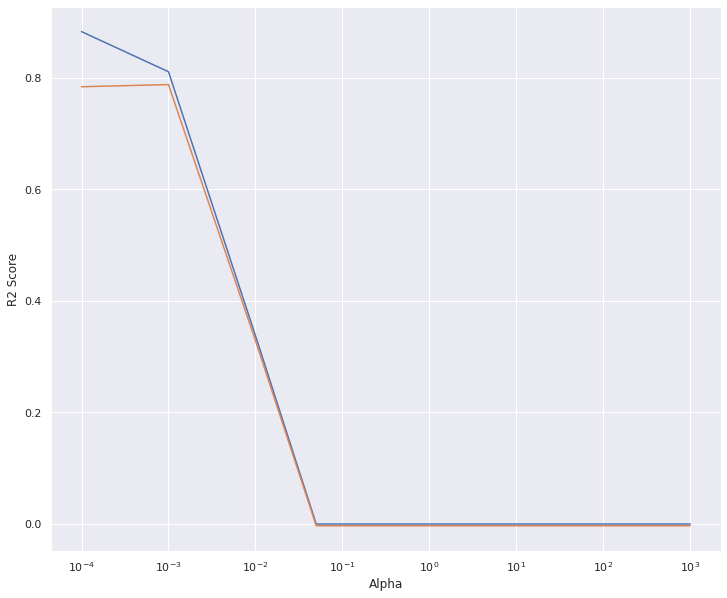

In [55]:
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [56]:
model_cv.best_params_


{'alpha': 0.001}

In [57]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lasso.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8063706403805845
0.7948047498465378


### Ridge Regression

In [58]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9105430605106319
0.8649740433631476


In [59]:
folds  = KFold(n_splits=5,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [60]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.003088      0.000112         0.001744        0.000027       0.0001   
1       0.003052      0.000065         0.001769        0.000036       0.0010   
2       0.003664      0.001115         0.001772        0.000022       0.0100   
3       0.005322      0.004304         0.001805        0.000039       0.0500   
4       0.003094      0.000152         0.001765        0.000030       0.1000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.730693           0.254771           0.298155   
1   {'alpha': 0.001}           0.733980           0.270786           0.322195   
2    {'alpha': 0.01}           0.758116           0.393198           0.495965   
3    {'alpha': 0.05}           0.794240           0.597043           0.754284   
4     {'alpha': 0.1}           0.803895           0.660135           0.824177   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.861358           0.435493         0.516094        0.239810   
1           0.862130           0.437963         0.525411        0.232662   
2           0.866381           0.444296         0.591591        0.186247   
3           0.867918           0.455195         0.693736        0.148565   
4           0.868239           0.466890         0.724667        0.146565   

   rank_test_score  split0_train_score  split1_train_score  \
0               27            0.918869            0.936333   
1               26            0.918859            0.936323   
2               24            0.918159            0.935661   
3               23            0.912325            0.930391   
4               21            0.906988            0.925640   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.911440            0.908330            0.913948   
1            0.911425            0.908314            0.913946   
2            0.910395            0.907264            0.913916   
3            0.902683            0.899627            0.913838   
4            0.896172            0.893368            0.913696   

   mean_train_score  std_train_score  
0          0.917784         0.009895  
1          0.917774         0.009897  
2          0.917079         0.009974  
3          0.911773         0.010783  
4          0.907173         0.011792

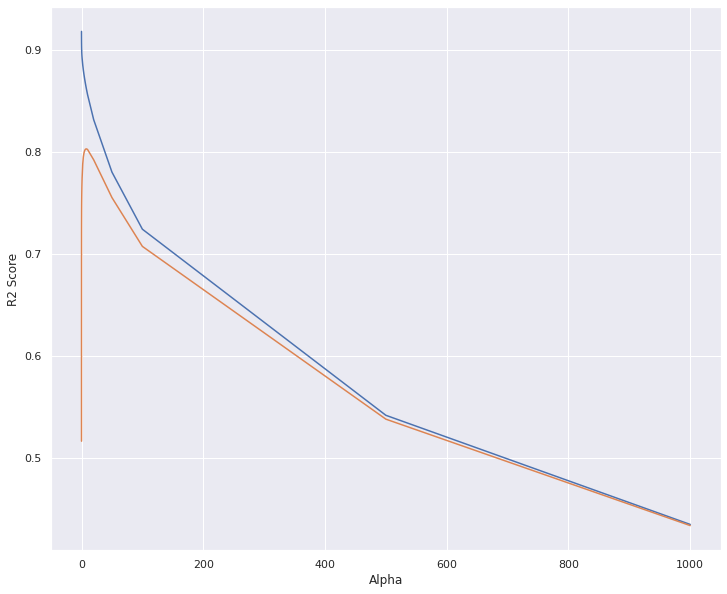

In [61]:
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.show()

In [62]:
model_cv.best_params_


{'alpha': 8.0}

In [63]:
ridge = Ridge(alpha = 8)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8576393251852251
0.8558368592572853


In [64]:
ridge.coef_.argmax(),ridge.coef_.max()

(2, 0.10008885147434327)

In [65]:
lasso.coef_.argmax(),lasso.coef_.max()

(13, 0.24971551176577964)

### The best lamda value for Lasso and Ridge are 0.001 & 8 respectively

In [66]:
ridge = Ridge(alpha = 16)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8402168305436732
0.8417498652620512


In [67]:
lasso = Lasso(alpha = 0.002)
lasso.fit(X_train,y_train)

y_pred_train = lasso.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = lasso.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.7628798615451196
0.7498101097316945


In [68]:
ridge.coef_.argmax(),ridge.coef_.max()

(2, 0.0791300900862348)

In [69]:
lasso.coef_.argmax(),lasso.coef_.max()

(2, 0.19944943988191804)

### Question 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [70]:
np.abs(lasso.coef_).argsort()[:5]

array([  0, 124, 125, 126, 127])

In [71]:
top_5_predictors=  list(X_train.iloc[:,np.abs(lasso.coef_).argsort()[:5]].columns)

In [72]:
top_5_predictors

['LotFrontage',
 'Electrical_FuseF',
 'Electrical_FuseP',
 'Electrical_Mix',
 'Electrical_SBrkr']

In [73]:
X_train_no_top_5 = X_train.drop(top_5_predictors, axis=1)


In [74]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train_no_top_5,y_train)

y_pred_train = lasso.predict(X_train_no_top_5)
print(r2_score(y_train,y_pred_train))

y_pred_test = lasso.predict(X_test[X_train_no_top_5.columns])
print(r2_score(y_test,y_pred_test))

0.8063743245769937
0.794816971018853


In [75]:
np.abs(lasso.coef_)

array([0.00000000e+00, 2.04254384e-01, 0.00000000e+00, 1.92606586e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.49702531e-01, 1.50536662e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.19630397e-02, 6.98672490e-02, 0.00000000e+00, 3.14667848e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.03696811e-04,
       0.00000000e+00, 0.00000000e+00, 1.56860094e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.05576712e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.13265978e-03,
       1.03280760e-02, 0.00000000e+00, 0.00000000e+00, 5.46260475e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.03117391e-03,
      

In [76]:
top_5_predictors_after=  list(X_train_no_top_5.iloc[:,np.abs(lasso.coef_).argsort()[:5]].columns)
top_5_predictors_after

['LotArea', 'Heating_OthW', 'Heating_Wall', 'HeatingQC_Fa', 'HeatingQC_Gd']

In [77]:
X_train.iloc[:,[2,2]]

OverallQual  OverallQual
210      0.444444     0.444444
318      0.666667     0.666667
239      0.555556     0.555556
986      0.555556     0.555556
1416     0.333333     0.333333
...           ...          ...
1009     0.444444     0.444444
802      0.666667     0.666667
53       0.888889     0.888889
350      0.888889     0.888889
79       0.444444     0.444444

[1021 rows x 2 columns]

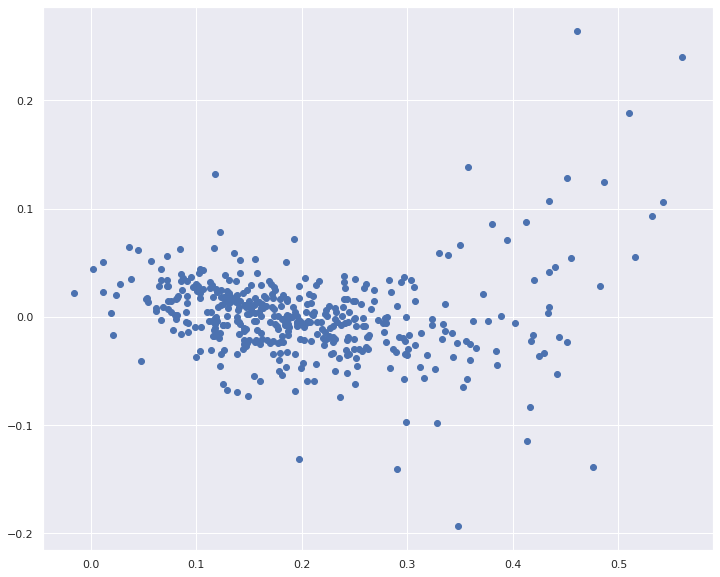

In [78]:
plt.scatter(y_test_pred, y_test - y_test_pred)

## Tried Polynomial regression also to see how it is different

In [79]:
poly = PolynomialFeatures(2)

In [80]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [81]:
lm  = LinearRegression()
lm.fit(X_train_poly, y_train)
y_pred_train = lm.predict(X_train_poly)
print(r2_score(y_train,y_pred_train))

y_pred_test = lm.predict(X_test_poly)
print(r2_score(y_test,y_pred_test))

1.0
0.7993756159969072


In [82]:
folds = KFold(n_splits=5,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train_poly,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [83]:
model_cv.best_params_


{'alpha': 0.001}

In [84]:
y_pred_train = model_cv.best_estimator_.predict(X_train_poly)
print(r2_score(y_train,y_pred_train))

y_pred_test =  model_cv.best_estimator_.predict(X_test_poly)
print(r2_score(y_test,y_pred_test))

0.8422760415651283
0.8206698328776232


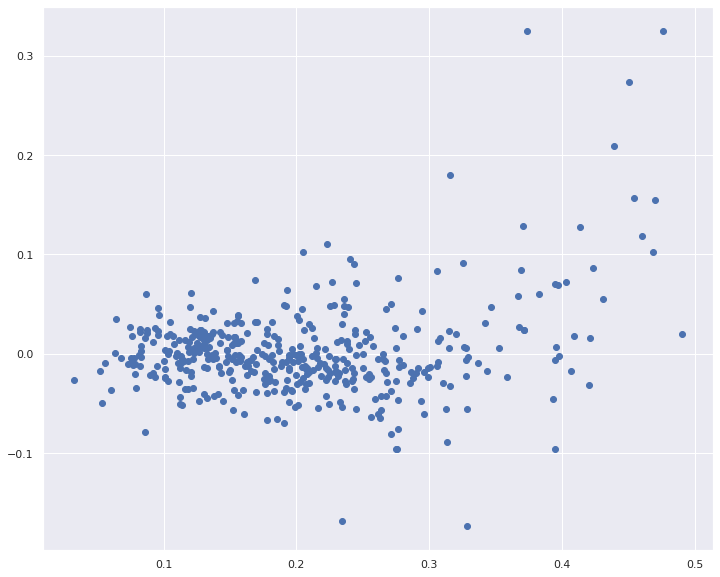

In [85]:
plt.scatter(y_pred_test, y_test - y_pred_test)

In [86]:
folds = KFold(n_splits=5,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000,10000 ]}

model = Ridge()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train_poly,y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 10000]},
             return_train_score=True, scoring='r2', verbose=1)

In [87]:
model_cv.best_params_


{'alpha': 100}

In [88]:
y_pred_train = model_cv.best_estimator_.predict(X_train_poly)
print(r2_score(y_train,y_pred_train))

y_pred_test =  model_cv.best_estimator_.predict(X_test_poly)
print(r2_score(y_test,y_pred_test))

0.9331105213215849
0.8786849575041034


In [89]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.148123      0.024713         0.003399        0.000065       0.0001   
1       0.127646      0.001654         0.003342        0.000010       0.0010   
2       0.129458      0.002027         0.003342        0.000022       0.0100   
3       0.129506      0.002353         0.003357        0.000028       0.0500   
4       0.144289      0.019810         0.003514        0.000158       0.1000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.781537           0.648313           0.730925   
1   {'alpha': 0.001}           0.784137           0.650276           0.737494   
2    {'alpha': 0.01}           0.787591           0.656464           0.745885   
3    {'alpha': 0.05}           0.793752           0.665993           0.754571   
4     {'alpha': 0.1}           0.798661           0.672837           0.760800   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.796704           0.352254         0.661947        0.163288   
1           0.797145           0.352097         0.664230        0.164337   
2           0.800961           0.353113         0.668803        0.165729   
3           0.812802           0.366721         0.678768        0.163993   
4           0.822918           0.379583         0.686960        0.161922   

   rank_test_score  split0_train_score  split1_train_score  \
0               28            1.000000            1.000000   
1               27            1.000000            1.000000   
2               26            0.999997            0.999997   
3               25            0.999975            0.999965   
4               24            0.999933            0.999908   

   split2_train_score  split3_train_score  split4_train_score  \
0            1.000000            1.000000            1.000000   
1            1.000000            1.000000            1.000000   
2            0.999996            0.999998            0.999998   
3            0.999978            0.999966            0.999978   
4            0.999946            0.999900            0.999937   

   mean_train_score  std_train_score  
0          1.000000     2.694011e-09  
1          1.000000     1.201774e-07  
2          0.999997     5.950030e-07  
3          0.999973     5.808481e-06  
4          0.999925     1.758084e-05

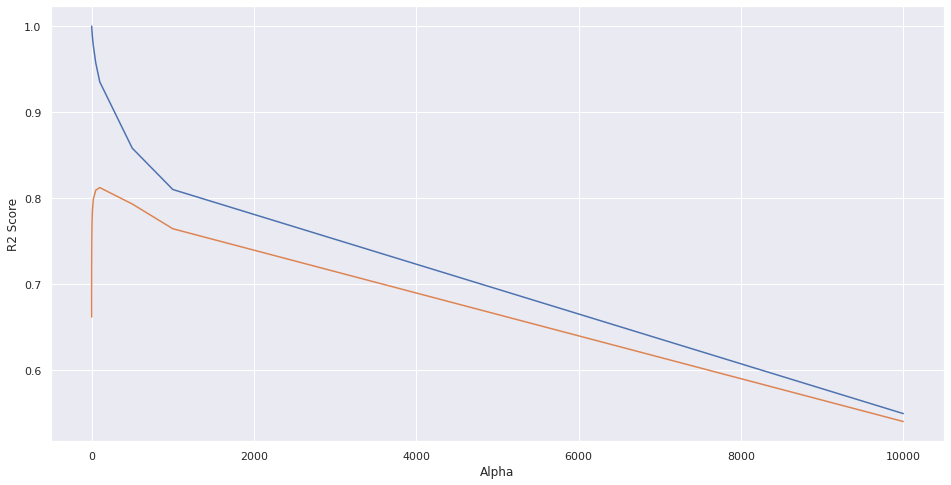

In [90]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()